# **AICP Internship Task Week 6**

In [ ]:
import pandas as pd

# Read CSV file
data = pd.read_csv('births.csv')

## Adding a new column “Decade” by calculating.

In [ ]:
data['Decade'] = (data['year'] // 10) * 10

print(data.head())

   year  month  day gender  births  Decade
0  1969      1  1.0      F    4046    1960
1  1969      1  1.0      M    4440    1960
2  1969      1  2.0      F    4454    1960
3  1969      1  2.0      M    4548    1960
4  1969      1  3.0      F    4548    1960


## Showing the descriptive statistics of the data.

In [ ]:
print("Descriptive Statistics:")
data.describe()

Descriptive Statistics:


,year,month,day,births,Decade
count,15086.000000,15086.000000,15067.000000,15086.000000,15086.000000
mean,1978.440475,6.512661,17.769894,4859.909386,1973.946706
std,5.796574,3.450959,15.284034,5203.340826,5.866785
min,1969.000000,1.000000,1.000000,1.000000,1960.000000
25%,1973.000000,4.000000,8.000000,4345.000000,1970.000000
50%,1978.000000,7.000000,16.000000,4786.000000,1970.000000
75%,1983.000000,10.000000,24.000000,5248.000000,1980.000000
max,2005.000000,12.000000,99.000000,151949.000000,2000.000000


## Checking if data contains any missing values

In [ ]:
data.isnull().sum()

year        0
month       0
day       480
gender      0
births      0
Decade      0
dtype: int64

##Trend of male & female births every decade

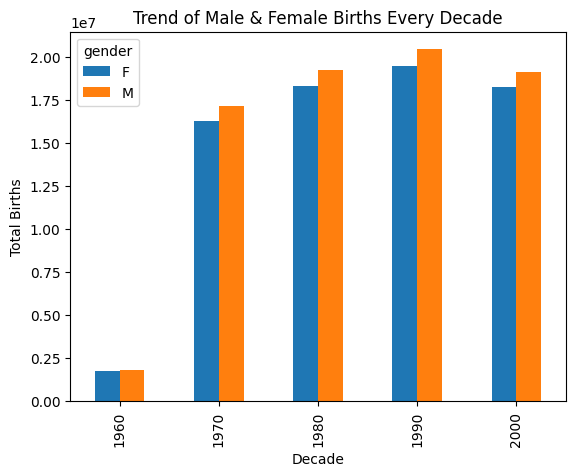

In [ ]:
import matplotlib.pyplot as plt

trend = data.groupby(['Decade', 'gender'])['births'].sum().unstack()
trend.plot(kind='bar')
plt.xlabel('Decade')
plt.ylabel('Total Births')
plt.title('Trend of Male & Female Births Every Decade')
plt.show()


## Removing outliers from dataset following techinque to include only those values that fall within 5 standard deviations from the mean

In [ ]:
mean = data['births'].mean()
std_dev = data['births'].std()
lower_bound = mean - 5 * std_dev
upper_bound = mean + 5 * std_dev

data = data[(data['births'] >= lower_bound) & (data['births'] <= upper_bound)]



## Plotting births by weekday for several decades.

<ipython-input-24-8966f1bf0d30>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Decade'] = pd.to_datetime(data['Decade'], format='%Y')
<ipython-input-24-8966f1bf0d30>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Weekday'] = data['Decade'].dt.day_name()


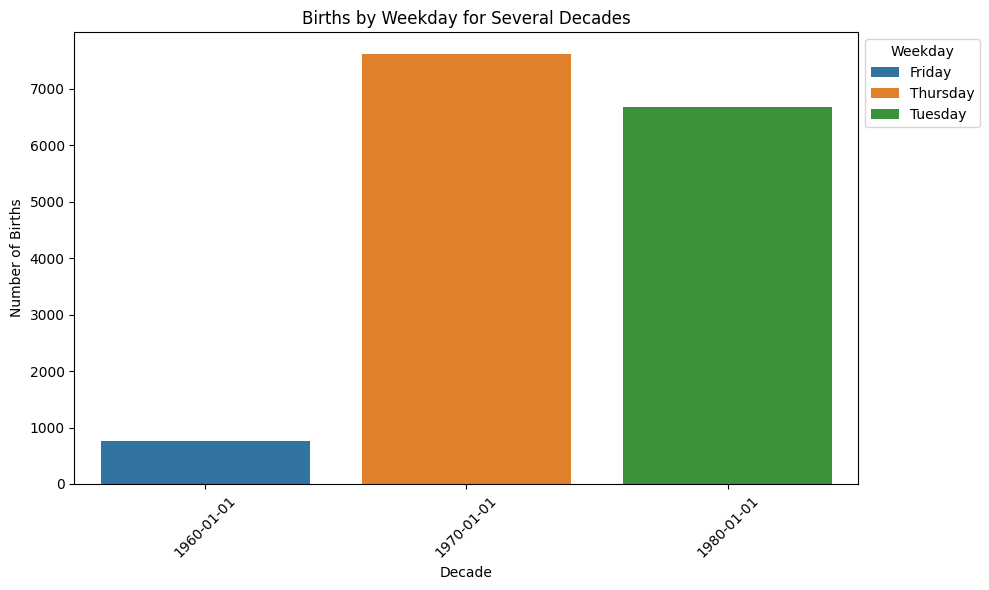

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

mean = data['births'].mean()
std_dev = data['births'].std()
data = data[(data['births'] >= mean - 5 * std_dev) & (data['births'] <= mean + 5 * std_dev)]

# Convert 'Decade' column to datetime
data['Decade'] = pd.to_datetime(data['Decade'], format='%Y')
data['Weekday'] = data['Decade'].dt.day_name()

# Plot births by weekday for several decades
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Decade', hue='Weekday')
plt.title('Births by Weekday for Several Decades')
plt.xlabel('Decade')
plt.ylabel('Number of Births')
plt.xticks(rotation=45)
plt.legend(title='Weekday', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()



**OBSERVATION:**
Friday, 1960s Decade: The observation suggests that the least number of births occurred on Fridays during the 1960s decade. This could indicate a trend where fewer births were scheduled or occurred naturally on Fridays during that period.

Thursday, 1970s Decade: The most births were observed on Thursdays during the 1970s decade according to the observation. This suggests a peak in birth rates on Thursdays during that particular decade, which could be influenced by various social or medical factors prevalent during that time.

Tuesday, 1980s Decade: The observation notes moderate births on Tuesdays during the 1980s decade. This indicates a relatively average or consistent level of birth rates on Tuesdays during that particular decade, compared to the extremes observed on Fridays and Thursdays in the previous decades.

## Grouping the data by month and day separately

In [ ]:
grouped_by_month = data.groupby(['month'])['births'].sum()
grouped_by_day = data.groupby(['day'])['births'].sum()

print("Grouped by Month:")
print(grouped_by_month)
print("\nGrouped by Day:")
print(grouped_by_day)



Grouped by Month:
month
1     5759568
2     7582391
3     5868651
4     5712231
5     5785602
6     5759233
7     6220777
8     6310276
9     6206785
10    6056193
11    6149799
12    5905087
Name: births, dtype: int64

Grouped by Day:
day
1.0     2286854
2.0     2303168
3.0     2309087
4.0     2286588
5.0     2296951
6.0     2308073
7.0     2314081
8.0     2322376
9.0     2315055
10.0    2327197
11.0    2319561
12.0    2322956
13.0    2290896
14.0    2335551
15.0    2333426
16.0    2332456
17.0    2335458
18.0    2334949
19.0    2331183
20.0    2337631
21.0    2329563
22.0    2317711
23.0    2305174
24.0    2290500
25.0    2283975
26.0    2300208
27.0    2314088
28.0    2328630
29.0    2189278
30.0    2141788
31.0    1342126
99.0       6403
Name: births, dtype: int64


## Focusing on the month and day only, you have a time series reflecting the average number of births by date of the year. From this, plot the data.

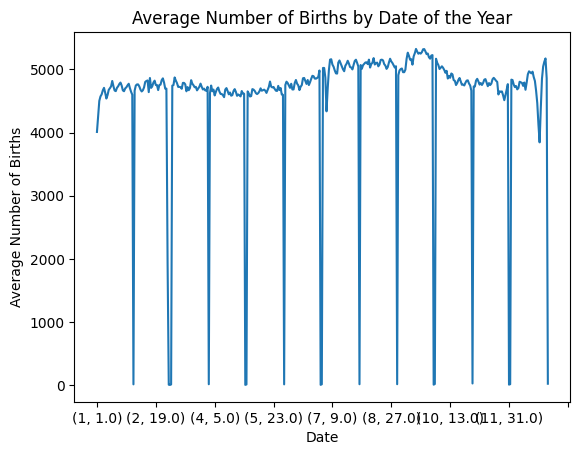

In [ ]:
grouped_by_date = data.groupby(['month', 'day'])['births'].mean()
grouped_by_date.plot()
plt.xlabel('Date')
plt.ylabel('Average Number of Births')
plt.title('Average Number of Births by Date of the Year')
plt.show()

